In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [12]:
def circle(z,r,n_points=1000):
    t = np.linspace(0,2*np.pi,n_points)
    return z + r*np.exp(1.j*t)

In [13]:
def f(z,alpha):
    return z*(1-alpha)+alpha*z**4

In [15]:
n_points=1000
n_circles = 100
radius = 0.1
x = np.linspace(-10.,10.,n_circles)
y = np.linspace(-10.,10.,n_circles)
circles = np.zeros(n_circles**2*n_points,dtype=np.complex128)
counter = 0
for i in x:
    for j in y:
        circles[counter*n_points:(counter+1)*n_points]=circle(i+1.j*j,radius,n_points)
        counter = counter + 1

In [16]:
mapped = f(circles,0.0)

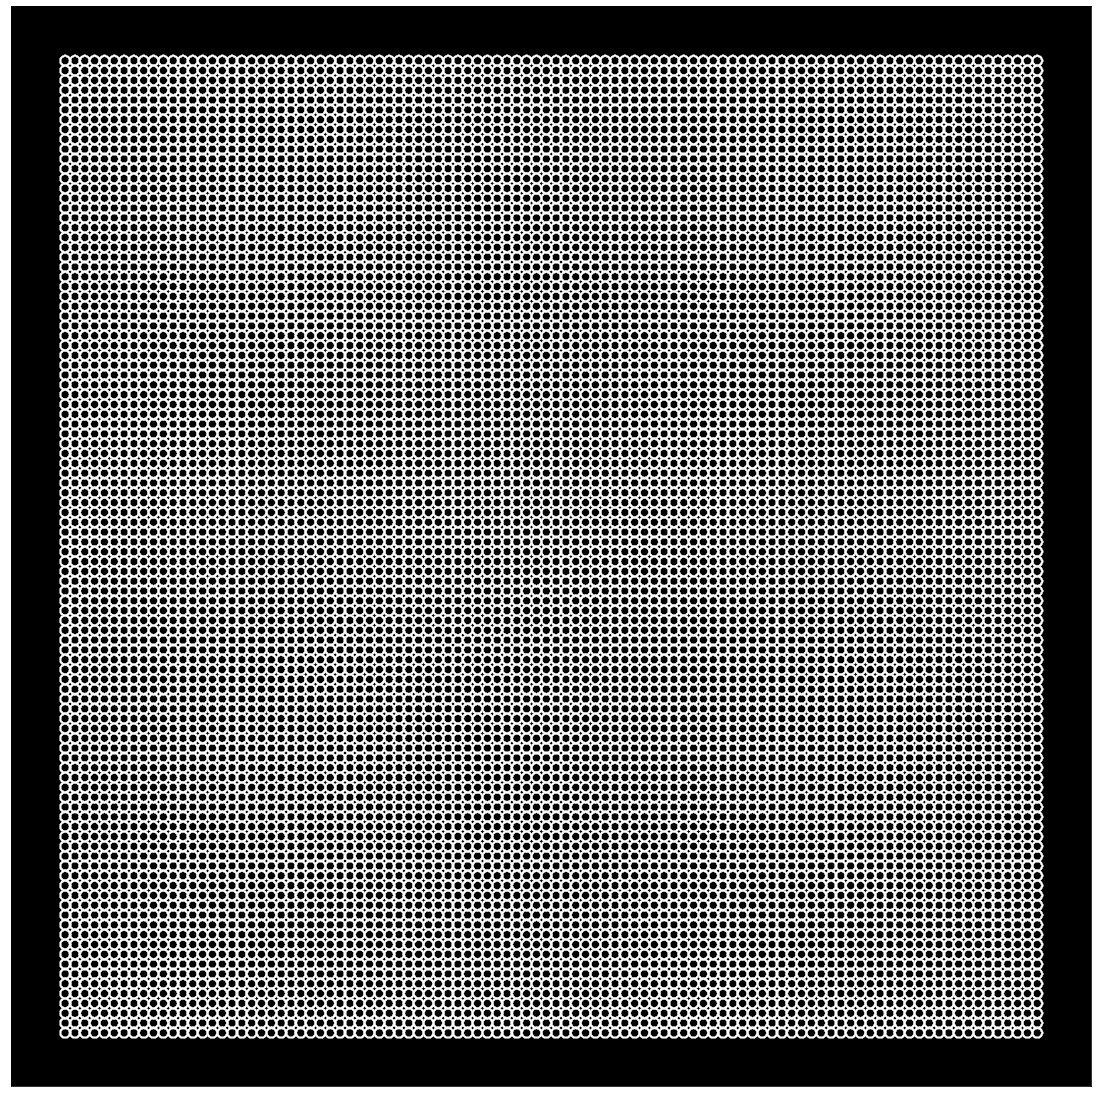

In [17]:
fig,ax = plt.subplots(figsize=(15,15))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.set_facecolor("black")
ax.scatter(np.real(mapped),np.imag(mapped),s=0.05,alpha=0.5, c="white")
ax.set_aspect('equal', 'box')
#ax.set_xlim([-5,5])
#ax.set_ylim([-5,5])
plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

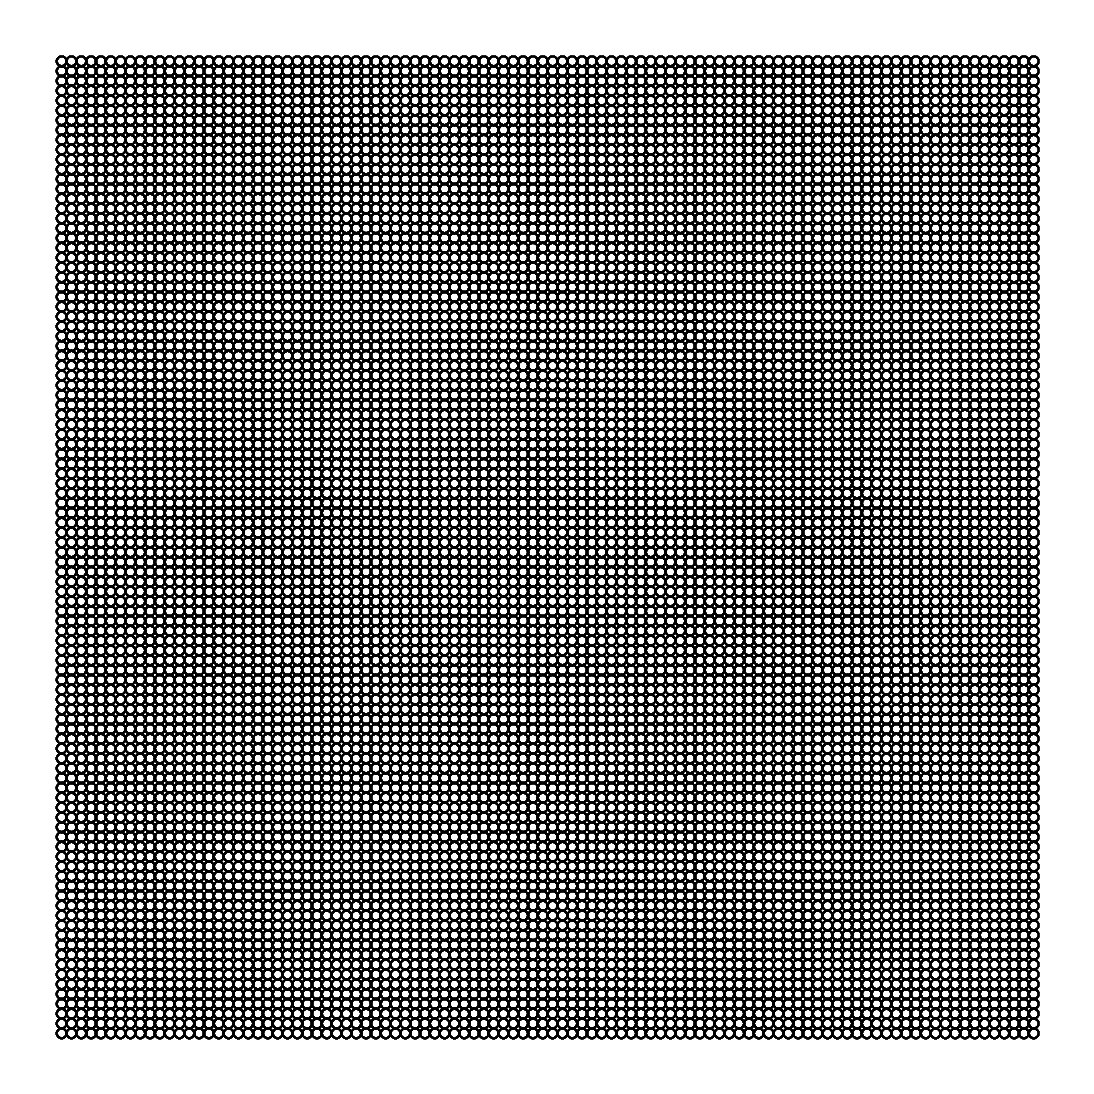

In [18]:
alphas = np.zeros(100,dtype=np.float64)
alphas[1:]=np.logspace(start=-5,stop=0,num=99)
mapped = f(circles,0.0)
fig,ax = plt.subplots(figsize=(15,15))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
#ax.set_facecolor("black")
im = ax.scatter(np.real(mapped),np.imag(mapped),s=0.05,alpha=1.0, c="black")
ax.set_aspect('equal', 'box')
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
#ax.set_xlim([-100.,100.])
#ax.set_ylim([-100.,100.])
plt.xticks([]), plt.yticks([])
#plt.savefig("orbit2.png",dpi=300)


def update(frame):
    mapped = f(circles,alphas[frame])
    positions = np.array([np.real(mapped), np.imag(mapped)]).T
    xmin = np.min(positions[:,0])
    xmax = np.max(positions[:,0])
    ymin = np.min(positions[:,1])
    ymax = np.max(positions[:,1])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.figure.canvas.draw()
    im.set_offsets(positions)
    return im,



In [19]:
animation = FuncAnimation(fig, update, interval=1, frames=100)
animation.save('z4.mp4', fps=25, dpi=160, bitrate=-1, codec="libx264",
                extra_args=['-pix_fmt', 'yuv420p'],
                metadata={'artist':'Simone Conradi'})
plt.show()